<center>
<img src="https://wpsovet.ru/wp-content/uploads/1/6/4/1642a836ada1355f35ef577d9024a728.jpg" width="700"> 

# Андан на экономе: домашнее задание 2
</center>

**ФИО:**

**id из контеста:**

**Внимание, конкурс!** 

Напиши свой любимый анекдот. Аcсисты и семенаристы устроют голосование. Лучшая тройка получит по бонусному баллу.

**Место для аника:**

## Общая информация


__Дата выдачи:__ 06.03.2023

__Мягкий дедлайн:__ 23:59MSK 02.04.2022

__Жесткий дедлайн:__ 23:59MSK 09.04.2022

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 100 баллов. За каждый день просрочки после мягкого дедлайна снимается 10 баллов. После жёсткого дедлайна работы не принимаются. Даже при опозданиии на одну секунду. Сдавайте работы заранее.

Мягкий дедлайн можно отодвинуть без потери баллов на 1,2 или 3 дня. Суммарно для откладывания в запасе есть три дня. Можно отодвинуть один дедлайн на три дня, а можно три дедлайна подвинуть на один день. Распоряжаться этими днями студент может как угодно. Жёсткий дедлайн, при этом, не меняется. Если такое произошло, нужно сообщить о сдвиге при сдаче работы.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Любой из студентов может быть вызван на защиту любого домашнего задания. В таком случае итоговая оценка студента определяется в результате защиты.

> За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено. Выводы должны быть релевантными. Не забывайте их писать. Если в вопросе требуется ответ словами, а его нет, вы будете терять довольно много баллов.

## Формат сдачи

Сам ноутбук называйте в формате hw-02-NUM-USERNAME.ipynb, где NUM — номер из вашего логина, а USERNAME — ваши фамилия и имя. Файл сдаётся в anytask.

Если хотите, можете разбить тетрадку на несколько разных для своего удобства.

In [1]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# Часть 1: рисковая 

В этом задании мы немного поработаем с ценами на акции. За задание можно получить $50$ баллов.

В табличке `prices.tsv` лежат данные о том, как менялась цена на акции из индексов [S&P-500](https://ru.wikipedia.org/wiki/S%26P_500), [NASDAQ-100](https://ru.wikipedia.org/wiki/Nasdaq-100) и [DJI](https://ru.wikipedia.org/wiki/Промышленный_индекс_Доу_—_Джонса) в течение последних $10$ лет. В табличке `information.tsv` лежит дополнительная полезная информация по ценным бумагам. Подгрузим эти таблицы и посмотрим на них. 

In [2]:
df_prices = pd.read_csv('data/price.tsv', sep='\t')
df_prices = df_prices.drop('GEHC', axis=1) # сликом молодая компания
print(df_prices.shape)
df_prices.head()

(2518, 521)


,Date,A,AAL,AAP,AAPL,ABBV,ABC,ABNB,ABT,ACGL,...,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZM,ZS,ZTS
0,2013-03-05 00:00:00,27.946215,13.245518,71.640678,13.298839,24.972109,41.335518,NaN,28.678448,16.563334,...,58.596577,39.023003,24.914204,39.376095,67.826096,44.869999,20.423979,NaN,NaN,31.940346
1,2013-03-06 00:00:00,28.326160,13.735741,70.923820,13.129805,25.125229,41.515339,NaN,28.347576,16.583332,...,58.563908,39.283100,25.693598,39.738384,67.343094,44.790001,20.907482,NaN,NaN,31.530493
2,2013-03-07 00:00:00,28.332716,13.971428,70.961044,13.281566,24.958796,41.172813,NaN,28.479918,16.813334,...,58.008087,39.515335,24.870417,39.940308,66.985306,44.619999,21.057535,NaN,NaN,32.191845
3,2013-03-08 00:00:00,28.188597,14.065701,71.538284,13.316731,24.858923,41.515339,NaN,28.686729,16.879999,...,58.178085,39.701115,24.896696,40.219440,67.441467,45.040001,21.090885,NaN,NaN,31.754053
4,2013-03-11 00:00:00,28.044483,14.263680,72.180695,13.506428,25.078619,41.575287,NaN,28.893517,16.940001,...,58.302341,39.812572,25.185684,40.290707,67.745613,45.470001,21.365984,NaN,NaN,31.837889


In [3]:
df_inf = pd.read_csv('data/information.tsv', sep='\t')
print(df_inf.shape)
df_inf.head()

(525, 12)


,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded,S&P-500,NASDAQ,DJI
0,A,Agilent Technologies Inc,reports,Health Care,Health Care Equipment,"Santa Clara, California",05.06.00,1090872.0,1999.0,True,False,False
1,AAL,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",23.03.15,6201.0,1934.0,True,False,False
2,AAP,Advance Auto Parts,reports,Consumer Discretionary,Automotive Retail,"Raleigh, North Carolina",09.07.15,1158449.0,1932.0,True,False,False
3,AAPL,Apple Inc.,reports,Information Technology,"Technology Hardware, Storage & Peripherals","Cupertino, California",30.11.82,320193.0,1977.0,True,True,True
4,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",31.12.12,1551152.0,1888.0,True,False,False


## 1.1 Разогреваемся

__а) [0 баллов]__ В колонке `Date` лежит день, когда торговалась бумага. Сейчас у неё тип `string`. Превратите её в `datetime` и сделайте индексом таблицы.

In [ ]:
# your code here
# (♡-_-♡) 

__б) [5 баллов]__ В колонках `'S&P-500', 'NASDAQ', 'DJI'` лежит True, если ценная бумага входит в соотвествующий индекс. Сколько ценных бумаг из таблицы входили в индекс NASDAQ? 

In [ ]:
# your code here
# ヽ(♡‿♡)ノ

Сколько ценных бумаг входят во все три индекса сразу?

In [ ]:
# your code here
# (´｡• ᵕ •｡`) 

В колонке `Founded` записан год основания компании. Сколько компаний из индекса S&P-500 были основаны в 19 веке (1900 год относится к 20 веку)? 

In [ ]:
# your code here
# (◕‿◕)♡

В колонке `GICS Sector` находится сектор экономики, в котором работает компания. Сколько всего уникальных секторов представлено в данных?

In [ ]:
# your code here
# (♡ﾟ▽ﾟ♡) 

Таблица с информацией устаревшая. Есть тикеры, которые попали в таблицу с ценами, но не попали в таблицу с информацией. Сколько таких тикеров? 

In [ ]:
# your code here
# ♡ (´｡• ω •｡`) ♡

__в) [5 баллов]__ Сколько компаний из индекса S&P-500 в сумме приходится на $3$ самых крупных сектора?

In [ ]:
# your code here
# (⌒_⌒;)

__г) [5 баллов]__ Теперь поработаем со стоимостью акций. 

Выберите 5 случайных тикеров и постройте для них картинки с динамикой цен и гистограммы. Дайте ответы на вопросы:

- Распределение стоимости акций похоже на нормальное?
- Что происходило с финансовыми рынками в течение последних $10$ лет? Они росли? Они падали? Видно ли, что были кризисы? 

__Ответ:__

In [ ]:
# your code here
# (＠_＠)

__д) [5 баллов]__ Найдите медианную цену акций за прошедший год (НЕ 10 лет) для каждого тикера. Сделайте `left join` таблицы с медианными ценами и таблицы с секторами экономики. Найдите для каждого сектора $95\%$ квантиль медианной цены.

In [ ]:
# your code here
# (￢_￢) 

## 1.2 Риск и доходность

__е) [5 баллов]__ Финансовые продукты описываются двумя характеристикам – __доходностью__ и __риском.__ Доходность – это процентное изменение стоимости за некоторый промежуток времени. Мы будем работать с доходностями за день: 

$$
R_t = \frac{P_t - P_{t-1}}{P_{t-1}}
$$

Перейдите к доходностям для всей таблицы `df_prices`. Для того, чтобы посчитать разность между каждой строкой таблицы и предыдущей строкой, используйте команду `.diff()`. Чтобы сдвинуть все строки на одну вниз, используйте команду `shift(1)`.  

Поделите результат работы команды `diff` на результат работы команды `shift`. Обратите внимание, что в первой колонке теперь все значения `NaN`, так как мы не можем посчитать доходность для самого первого дня. Удалите из таблицы эту строку. 

In [ ]:
# your code here
# (⊙_⊙)

df_r = ...

Постройте для 5 случайно выбранных тикеров картинку с динамикой доходностей, гистограмму доходностей и ящики с усами. Ответьте на следующие вопроcы:

- Имеют ли доходности по акциям нормальное распределение? 
- Видно ли по ящику с усами, что в данных довольно много выбросов? 

__Ответ:__ ваш текст

In [ ]:
# your code here
# =^･ｪ･^=

Чтобы посмотреть, насколько сильно распределение отличается от нормального, можно вспользоваться диаграммой квантиль-квантиль. На картинке ниже видно, что центр распределения похож на нормальное, а квантили на хвостах отличаются от нормальных в более тяжёлую сторону. 

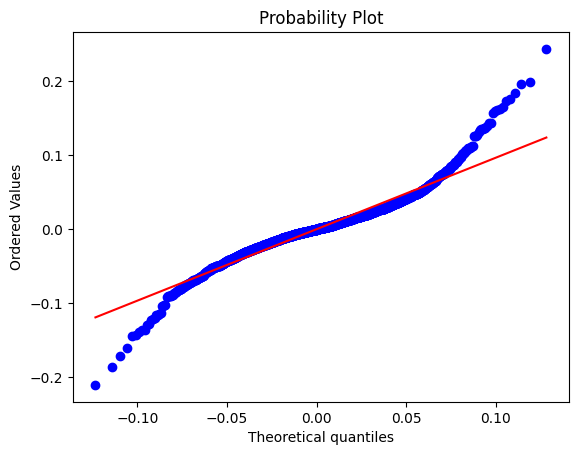

In [19]:
ax = plt.subplot(111)
x = df_r['TSLA'].values
sts.probplot(x, dist="norm", sparams=(x.mean(), x.std()), plot=ax);

__ё) [10 баллов]__  Без буквы `ё` никуда, скажут нам [Пафнутий Чебышёв](https://ru.wikipedia.org/wiki/%D0%A7%D0%B5%D0%B1%D1%8B%D1%88%D1%91%D0%B2,_%D0%9F%D0%B0%D1%84%D0%BD%D1%83%D1%82%D0%B8%D0%B9_%D0%9B%D1%8C%D0%B2%D0%BE%D0%B2%D0%B8%D1%87) и [Лёв Толстой](https://arzamas.academy/special/ruslit/writers/tolstoy).  

Разобьём выборку на обучающую и тестовую. Первые 4 года войдут в обучающую выборку, последний год в тестовую. Мы будем оценивать рискованность и доходность разных активов на обучающей выборке, а затем смотреть, насколько хорошо мы это сделали на тестовой.

In [20]:
df_train = df_r[df_r.index  < '2022-03-03']
df_test = df_r[df_r.index  >= '2022-03-03']

__Все расчёты ниже делайте по обучающей выборке.__ 

Посчитайте для всех компаний на обучающей выборке среднюю доходность (просто сделайте `.mean()` за весь период). Найдите 10 самых доходных компаний и 10 самых убыточных.  Есть ли среди самых доходных компаний Тесла? :) 

In [ ]:
# your code here
# C (・_・)ノ

R = ...

Один из способов измерить, насколько ценная бумага рискованная -  использовать стандартное отклонение. Посчитайте для всех компаний стандартное отклонение доходности. Найдите 10 самых рискованных компаний и 10 самых безрисковых.  Есть ли среди самых рискованных компаний Тесла? :) 

In [ ]:
# your code here
# ٩(ˊ〇ˋ*)و

STD = ...

Обычно инвесторы принимают решение покупать бумагу к себе в портфель, отталкиваясь от того какие соотношения доходность/риск существуют на рынке. Создайте таблицу `df_result`. Запищите туда три колонки: тикер, доходность и стандартное отклонение.

In [24]:
df_result = ... # your code here
df_result.head()

,std,r
A,0.015556,0.000808
AAL,0.031476,0.000579
AAP,0.020050,0.000659
AAPL,0.017579,0.001268
ABBV,0.017331,0.000925


Постройте для наших ценных бумаг диаграмму рассеивания, на которой будет видно, где по своей доходности и риску находится какая ценная бумага.

Отдельно отметьте на картинке точку, соотвествующую Тесле так, чтобы её было видно. Можно ли купить какую-то другую бумагу, которая обладает примерно такой же доходностью как тесла, но при этом её риск меньше? 

__Ответ:__ ваш текст

In [ ]:
# your code here
# (っ˘ڡ˘ς) 

Чем больше риск, тем выше потенциально может оказаться доходноcть. __Но при этом мы с более высокой вероятностью можем уйти в убыток.__ 

__ж) [5 баллов]__  Надо понимать, что стандартное отклонение чувствительно к выбросам. Поэтому в качестве меры риска часто рассматривают $\text{VaR}$. 

__Value-at-Risk__ — одна из самых распространенных форм измерения финансовых рисков. Общепринято обозначается $\text{VaR}$. Еще его часто называют статистика $16:15$, такое название он получил потому, что $16:15$ – это время, в которое он якобы должен лежать на столе главы правления банка JPMorgan. (В этом банке данный показатель был впервые введен с целью повышения эффективности работы с рисками).

__Value-at-Risk__ на каком-либо уровне (скажем, $5\%$) – это просто квантиль уровня $5\%$. То есть это такая доходность, что в $95\%$ случаев у нас дела будут лучше.

Посчитайте $5\%$ $\text{VaR}$ по всем ценным бумагам. Для этого используйте метод `quantile()`. Найдите 10 самых рискованных компаний и 10 наименее рискованных компаний с точки зрения этого показателя. Запишите `VaR` в табличку `df_result` отдельной колонкой (нужно сделать `join`). Домножьте значения VaR на -1, чтобы интерпретировать числа как потери.  

In [26]:
# your code here
# ｀、ヽ｀ヽ｀、ヽ(ノ＞＜)ノ ｀、ヽ｀☂ヽ｀、ヽ

VaR = ...

In [27]:
# добавим получившиеся значения в нашу таблицу
VaR.name = 'VaR'
df_result = df_result.join(VaR)
df_result.head()

,std,r,VaR
A,0.015556,0.000808,0.025164
AAL,0.031476,0.000579,0.044087
AAP,0.020050,0.000659,0.026499
AAPL,0.017579,0.001268,0.025629
ABBV,0.017331,0.000925,0.024926


Постройте для наших ценных бумаг диаграмму рассеивания, на которой будет видно, где по своей доходности и риску находится какая ценная бумага. Отдельно отметьте теслу. В качестве меры риска используйте $\text{VaR}.$

In [ ]:
# your code here
# ٩(x̯x)۶

$\text{VaR}$ хорош тем, что описывает именно ту часть распределения, которую мы боимся. Но $\text{VaR}$ - это лучшее из $5\%$ худших случаев. А что лежит в тех $5\%$ худших случаев?…

__Expected shortfall__ - это среднее значение по всем тем точкам, что оказались хуже $\text{VaR}$, То есть среднее по худшим $5\%$. Эта метрика показывает что в среднем произойдёт с нашей доходностью в этих самых плохих $5\%$ случаев. 

- Рассчитаете $\text{ES}$ для Теслы
- Предположим, что мы вложили в Теслу $1000$ долларов в один из самых неудачных дней. Сколько в среднем денег мы потеряем от этой $1000$ долларов к концу дня? 
- Посчитайте, сколько денег мы заработаем в $5\%$ лучших случаев к концу дня? 

__Важно:__ $\text{VaR}$ и $\text{ES}$ в этом пункте - отрицательные числа.

In [ ]:
# your code here
# ( ͡⊙ ͜ʖ ͡⊙)

Посчитайте $\text{ES}$ по всем ценным бумагам. Домножьте получившееся значение на (-1). Запишите его отдельным столбцом в `df_result` (нужно сделать `join`)

In [ ]:
# your code here
# \_(ツ)_/¯

1. Округлите данные до 3-х знаков после запятой `df_result.round(3)`
2. Отсортируйте таблицу `df_result` по колонке `ES` по убыванию
3. Запишите получившиеся результаты в таблицу с колонками `'Ticker', 'std', 'r', 'VaR', 'ES'` в файл `var_result` Таблица должна быть без индексов. Последняя строка не должна быть пустой. Колонки друг от друга отделяются запятыми. Порядок колонок должен быть именно таким.
4. Отправьте свой файл `var_result.csv` в контест (https://contest.yandex.ru/contest/47242/problems/A) и прикрепите/укажите ниже ваш никнейм и ссылку на успешную посылку.

> __Дисклеймер:__ Успешная посылка в контесте является обязательным условием получения полного балла за этот (и следующий) пункт. Если добиться успешной посылки не удастся, баллы будут выставляться на усмотрение проверяюшего.

> При этом ОК в контесте не гарантирует полный балл. Оценка всё равно может быть снижена в случае обнаружения неэффективностей или ошибок в коде. Если вы сдадите в AnyTask очевидно неработающий код или ноутбук без кода, но при этом в контест будет сдан корректный файл, то это будет расцениваться как плагиат. На всякий случай просим вас сдать вместе с ноутбуком файл res_fall.csv в anytask.

__Какая метрика лучше?__

Никакая. Все рассуждения о риске – это попытки уложить функцию распределения доходностей в одно единственное число. Поэтому информация потеряется и все метрики будут не идеальны. А к чему это приведет, можно прочитать в книге Скотта Паттерсона ["Кванты. Как волшебники от математики заработали миллиарды и чуть не обрушили фондовый рынок."](https://disk.yandex.ru/i/ryFfPZ8_1uTO6g) Тем не менее, какие-то цифры, на которые можно было бы ориентироваться при принятии решений необходимы.

## 1.3 VaR-кривая 

__з) [10 баллов]__ Мы что-то насчитали. А это вообще работает? Давайте проверим на тестовой выборке для Теслы.

In [33]:
var_tsla = df_train['TSLA'].quantile(0.05)
df_tsla = df_test['TSLA'].reset_index()
df_tsla['is_bad'] = (df_test['TSLA'].values < var_tsla)
df_tsla['is_bad'].mean()

0.14285714285714285

На тестовой выборке мы пробили для Теслы VaR в 14% случаев вместо 5%. Это очень плохой результат. Наша оценка риска оказалась провальной. Можно с помощью теста Купика проверить значимость этих отличий, но мы пока что не будем это делать. Отложим эту историю до домашки про гипотезы.

Нарисуем VaR-кривую.

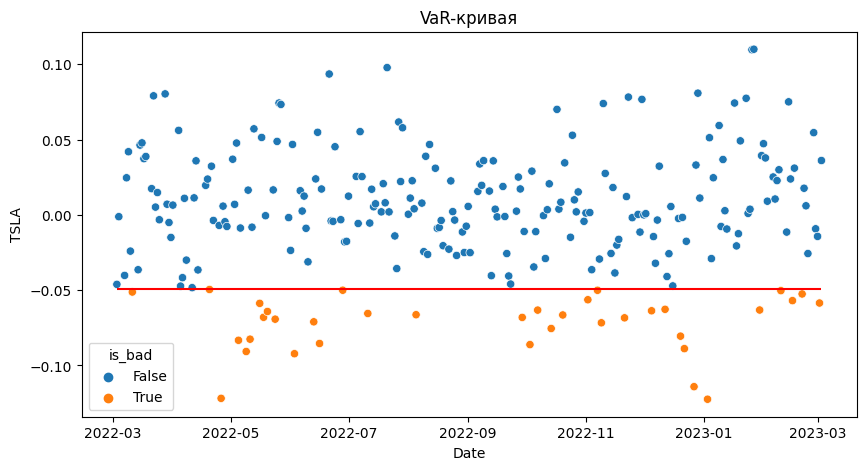

In [34]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_tsla, x='Date',y='TSLA', hue='is_bad')
plt.hlines(var_tsla, df_tsla.Date.min(), df_tsla.Date.max(), color='red')
plt.title('VaR-кривая');

А почему все это плохо? А потому, что мы не расширяем обучающую выборку, то есть не учитываем новую информацию. Мы один раз предсказали $\text{VaR}$ и так с ним и сидим. Давайте сделаем по-другому.

- Выделите $N$ точек (первые 4 года), найдите по ним $\text{VaR}$ для $N+1$ дня. Потом сдвинем $N$ точек вправо и найдём $\text{VaR}$ по ним для точки $N + 2$. И так далее. Тогда $\text{VaR}$ будет в каждой точке разный. 
- Нарисуйте получившуюся для Теслы кривую на картинке.
- Посчитайте как часто мы пробивали $\text{VaR}$ на практике, улучшилась ли цифра?

In [ ]:
# your code here
# ʕ•ᴥ•ʔ

Способ оценки $\text{VaR},$ который мы использовали, называется **историческим.** Кроме него есть довольно много других способов. Например:

- можно попробовать подогнать какое-то распределение под данные и взять его квантиль
- можно попробовать обучить модель машинного обучения предсказывать соотвествующий квантиль
- можно обучить какую-нибудь модель на временном ряде
- можно попробовать отдельно моделировать хвосты распределения

Часть способов более подробно можно [посмотреть в лекциях Ильи Езепова.](https://rpubs.com/iezepov) Они немного староваты, но хороши. 

__и) [бонусные 5 баллов]__

Разберитесь как работает какой-нибудь ещё метод оценки $\text{VaR}$ и реализуйте его. Сравните его работу с историческим методом на нескольких ценных бумагах из наших данных. Например, вы можете разобраться с [ОГРом](https://rpubs.com/iezepov/e502lec2) или [моделированием хвостов.](https://rpubs.com/iezepov/e502lec6) Весь код должен быть написан на питоне. Часть бонуса -- попытаться найти библиотеки для этого.

In [ ]:
# your code here
# [✖‿✖]

  ---------

# Часть 2: чековая

За задание можно получить $50$ баллов. Мы будем работать с покупками и чеками. Смотреть за корреляциями в покупках довольно полезно.

> В 1992 году группа по консалтингу в области ритейла компании Teradata под руководством Томаса Блишока провела исследование 1.2 миллиона транзакций в 25 магазинах для ритейлера Osco Drug (Drug Store — формат разнокалиберных магазинов у дома). После анализа всех этих транзакций самым сильным правилом получилось «Между 17:00 и 19:00 чаще всего пиво и подгузники покупают вместе». 

>К сожалению, такое правило показалось руководству Osco Drug настолько контринтуитивным, что ставить подгузники на полках рядом с пивом они не стали. Хотя объяснение паре пиво-подгузники вполне себе нашлось: когда оба члена молодой семьи возвращались с работы домой (как раз часам к 5 вечера), жены обычно отправляли мужей за подгузниками в ближайший магазин. И мужья, не долго думая, совмещали приятное с полезным — покупали подгузники по заданию жены и пиво для собственного вечернего времяпрепровождения.

Для работы будем использовать датасет о продуктовых корзинах: https://www.kaggle.com/heeraldedhia/groceries-dataset

- `id` - номер покупки (чека)
- `fielddate` - дата покупки
- `product` - что было куплено

In [35]:
df = pd.read_csv('data/groceries.csv', sep=',')
df.columns = ['id', 'fielddate', 'product']
print(df.shape)
df.head()

(38765, 3)


,id,fielddate,product
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


## 2.1 Разогреваемся

__а) [10 баллов]__ Сколько всего уникальных заказов было сделано?

In [36]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# your code here
# ┌(ಠ_ಠ)┘

3898

Какие товары покупались чаще всего? Найдите топ-10 самых популярных товаров и изобразите частоту их покупок на столбиковой диаграмме. 

In [ ]:
# your code here
# ( .-. )

Визуализируйте как часто покупались товары с помощью [облака слов.](https://www.python-graph-gallery.com/wordcloud/) Для графика используйте все товары из датасета. 

In [ ]:
from wordcloud import WordCloud

# your code here
# ฅ^•ﻌ•^ฅ 

__б) [10 баллов]__ Начнём анализировать совместные покупки товаров.

В таблице выше в каждой строке записана информация о покупке конкретного товара. Давайте сделаем табличку размера "число товаров" на "число покупок", чтобы понимать какие товары покупались вместе, а какие нет. 

По строкам отложите номера чеков. По столбцам отложите название продуктов. На пересечении должно стоять число товаров, купленное в этом чеке. Используйте для этого команду `pivot_table`.

In [38]:
# your code here
# ٩(⁎❛ᴗ❛⁎)۶

product,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
id,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,2,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0


В нашей матрице огромное число нулей. Обычно такие матрицы называют разряжеными. Мы занимаем нулями кучу свободной памяти, которую мы могли бы не занимать, если бы хранили данные [в виде разреженных матриц.](https://cmdlinetips.com/2018/03/sparse-matrices-in-python-with-scipy/) У нас данные небольшие, поэтому мы забьём на неоптимальность и продолжим работать с ними в `pandas`.

Постройте матрицу корреляций Пирсона. Визуализируйте матрицу с помошью heatmap.

In [ ]:
# your code here
# ヾ(๑╹◡╹)ﾉ

Какие продукты сильнее всего коррелируют с яйцами, `domestic eggs` (их чаще всего покупают вместе)? Какие продукты "мешают" купить яйца, то есть отрицательно коррелируют с их покупкой? 

In [ ]:
# your code here
# ༼ つ ಥ_ಥ ༽つ

Какие два продукта коррелируют сильнее всего? 

In [ ]:
# your code here
# ( ￣ー￣)

__Вопрос:__ почему корреляция пирсона это плохой способ измерить взаимосвязть между покупками?

__Ответ:__


## 2.2 Коэффициент корреляции Мэтьюса

__Коэффициент корреляции Мэтьюса__ — это мера силы взаимосвязи между двумя бинарными переменными. Для того чтобы его вычислить, необходимо использовать таблицу сопряженности

|        |  $0$   |  $1$   |
|:------:|:------:|:------:|
| $0$    |  $a$   |  $b$   |
| $1$    |  $c$   |  $d$   |

В строках таблицы сопряжённости находятся значения одного признака, по столбцам — второго, в каждой ячейке — количество объектов, на которых реализовалась эта пара. Коэффициент корреляции Мэтьюса вычисляется по данным из таблицы сопряжённости следующим образом:

$$
MCC(X_1, X_2) = \frac{a \cdot d - b \cdot c}{\sqrt{(a + b) \cdot (a + c) \cdot (b + d) \cdot (c + d)}}
$$

Точно так же, как и коэффициенты Пирсона и Спирмена, корреляция Мэтьюса лежит в диапазоне от $−1$ до $1.$ Нулевое значение соответсвуте отсутствию взаимосвязи между переменными. Значение $MCC(X_1, X_2) = 1$ соотвествует случаю, когда $X_1$ и $X_2$ полностью совпадают, то есть $b = c = 0$. Значение  $MCC(X_1, X_2) = -1$ соответствует случаю, когда каждое значение $X_1$ отличается от каждого значения $X_2$. 

Для категориальных переменных можно также считать коэффициент V-Крамера. Подробнее можно почитать про разные корреляции [в этом конспекте.](https://disk.yandex.ru/i/Znahvyg3mIrW9A)

__в) [10 баллов]__ 

1. Оставьте в таблице сопряжённости два значения. Нулевое, если товара не был в чеке и единичное, если был
2. Отфильтруйте из рассмотрения товары, которые встречались меньше, чем в 10 чеках (оставить то, что `>= 10`)
3. Посчитайте для каждой пары коэффициент корреляции Мэтьюса. Чтобы удобнее было перебрать все сочетания, используйте `combinations` из модуля `itertools`.
4. Запишите получившиеся результаты в таблицу с колонками `product_1, product_2, matthews_corrcoef`. 
5. Отсортируйте получившиеся пары по коэффициенту Мэтьюса от 1 к -1 и сохраните первые сто строк получившейся таблички в файл `result_matthews.csv` Таблица должна быть без индексов. Последняя строка не должна быть пустой. Колонки друг от друга отделяются запятыми.

In [ ]:
from sklearn.metrics import matthews_corrcoef

# your code here
# (⌐■_■)

Отправьте свой файл `result_mat.csv` в контест (https://contest.yandex.ru/contest/47242/problems/B/) и прикрепите/укажите ниже ваш никнейм и ссылку на успешную посылку.

> __Дисклеймер:__ Успешная посылка в контесте является обязательным условием получения полного балла за этот (и следующий) пункт. Если добиться успешной посылки не удастся, баллы будут выставляться на усмотрение проверяюшего.

> При этом ОК в контесте не гарантирует полный балл. Оценка всё равно может быть снижена в случае обнаружения неэффективностей или ошибок в коде. Если вы сдадите в AnyTask очевидно неработающий код или ноутбук без кода, но при этом в контест будет сдан корректный файл, то это будет расцениваться как плагиат. На всякий случай просим вас сдать вместе с ноутбуком файл res_fall.csv в anytask.

## 2.3 Независимость событий

 Конечно же, корреляция — это [не единственный способ искать](https://habr.com/ru/company/ods/blog/353502/) между покупками ассоциативные правила. Давайе попробуем другой подход.

Мы знаем, что события $A$ и $B$ называются независимыми, если $P(AB) = P(A)\cdot P(B)$. Отталкиваясь от этого определения, можно ввести другую характеристику, которая показывает, насколько продукты зависят друг от друга, а именно __поддержку (lift).__ 

$$
lift = \frac{P(AB)}{P(A)\cdot P(B)}
$$

Эта метрика описывает отношение зависимости товаров к их независимости. Если оказалось, что `lift = 1`, это означает, что покупка товара $A$ не зависит от покупки товара $B$. Если `lift > 1`, то это означает, что вероятность встретить оба товара в чеке, $P(AB)$ высокая, то есть товары покупают вместе. Если `lift < 1`, это означает, что товары, наоборот, очень часто покупают по-отдельности. 

__г) [5 баллов]__ Посчитайте значение нашей метрики для яиц и молока (`'whole milk', 'domestic eggs'`).

> Вам аккуратно нужно сделать три среза по условию  `>= 1`. Там, где пара надо делать срез так, чтобы оба товара дали `True`. Сделать это в одну строку вам поможет метод `.all(axis=1)`. Частоты можно получить методом `.mean()`, так как python думает, что `False` - это ноль, а `True` - это единица.

In [ ]:
# your code here
#  ლ(ಠ益ಠლ)

__д) [10 баллов]__ 

1. Оставьте в таблице сопряжённости два значения. Нулевое, если товара не был в чеке и единичное, если был
2. Отфильтруйте из рассмотрения товары, которые встречались меньше, чем в 10 чеках (оставить то, что `>= 10`)
3. Посчитайте для каждой пары значение поддержки, `lift`. Чтобы удобнее было перебрать все сочетания, используйте `combinations` из модуля `itertools`.
4. Запишите получившиеся результаты в таблицу с колонками `product_1, product_2, lift`. 
5. Отсортируйте получившиеся пары по значению lift от больших к меньшим и сохраните первые сто строк получившейся таблички в файл `result_lift.csv` Таблица должна быть без индексов. Последняя строка не должна быть пустой. Колонки друг от друга отделяются запятыми.

In [ ]:
# your code here
# (❍ᴥ❍ʋ)

Отправьте свой файл `result_lift.csv` в контест (https://contest.yandex.ru/contest/47242/problems/C/) и прикрепите/укажите ниже ваш никнейм и ссылку на успешную посылку.

> __Дисклеймер:__ Успешная посылка в контесте является обязательным условием получения полного балла за этот (и следующий) пункт. Если добиться успешной посылки не удастся, баллы будут выставляться на усмотрение проверяюшего.

> При этом ОК в контесте не гарантирует полный балл. Оценка всё равно может быть снижена в случае обнаружения неэффективностей или ошибок в коде. Если вы сдадите в AnyTask очевидно неработающий код или ноутбук без кода, но при этом в контест будет сдан корректный файл, то это будет расцениваться как плагиат. На всякий случай просим вас сдать вместе с ноутбуком файл res_fall.csv в anytask.

__е) [5 баллов]__ Давайте проинтепретируем результаты.

- Посмотрите на 10 пар продуктов с самой высокой корреляцией Мэтьюса и на 10 пар с самой низкой. Проинтерпретируйте, насколько эта корреляция логична? Придумайте ситуации, когда какие-то из пар могли бы покупаться вместе.
- Посмотрите на 10 пар продкутов с самым высоким lift, насколько логично они выделились? 
- Насколько большим оказалось пересечение двух методов? Как думаете, почему? А если взять первые сто пар?

__Ответы:__  ваш текст

In [ ]:
# your code here
# (｡❤‿❤｡)

__ё) [бонусные 5 баллов]__ 

Иногда в чеках пытаются искать __продукты-якоря.__ То есть продукты, которые являются основными. Например: айфон - основной продукт, наушники и чехол - дополнения к нему. Предложите алгоритм поиска таких товаров, похожий на то, что мы делали выше. Реализуйте алгоритм поиска якорей, который вы придумали. 

__Ответ:__ ваш текст


In [ ]:
# your code here
# [̲̅$̲̅(̲̅5̲̅)̲̅$̲̅]